/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


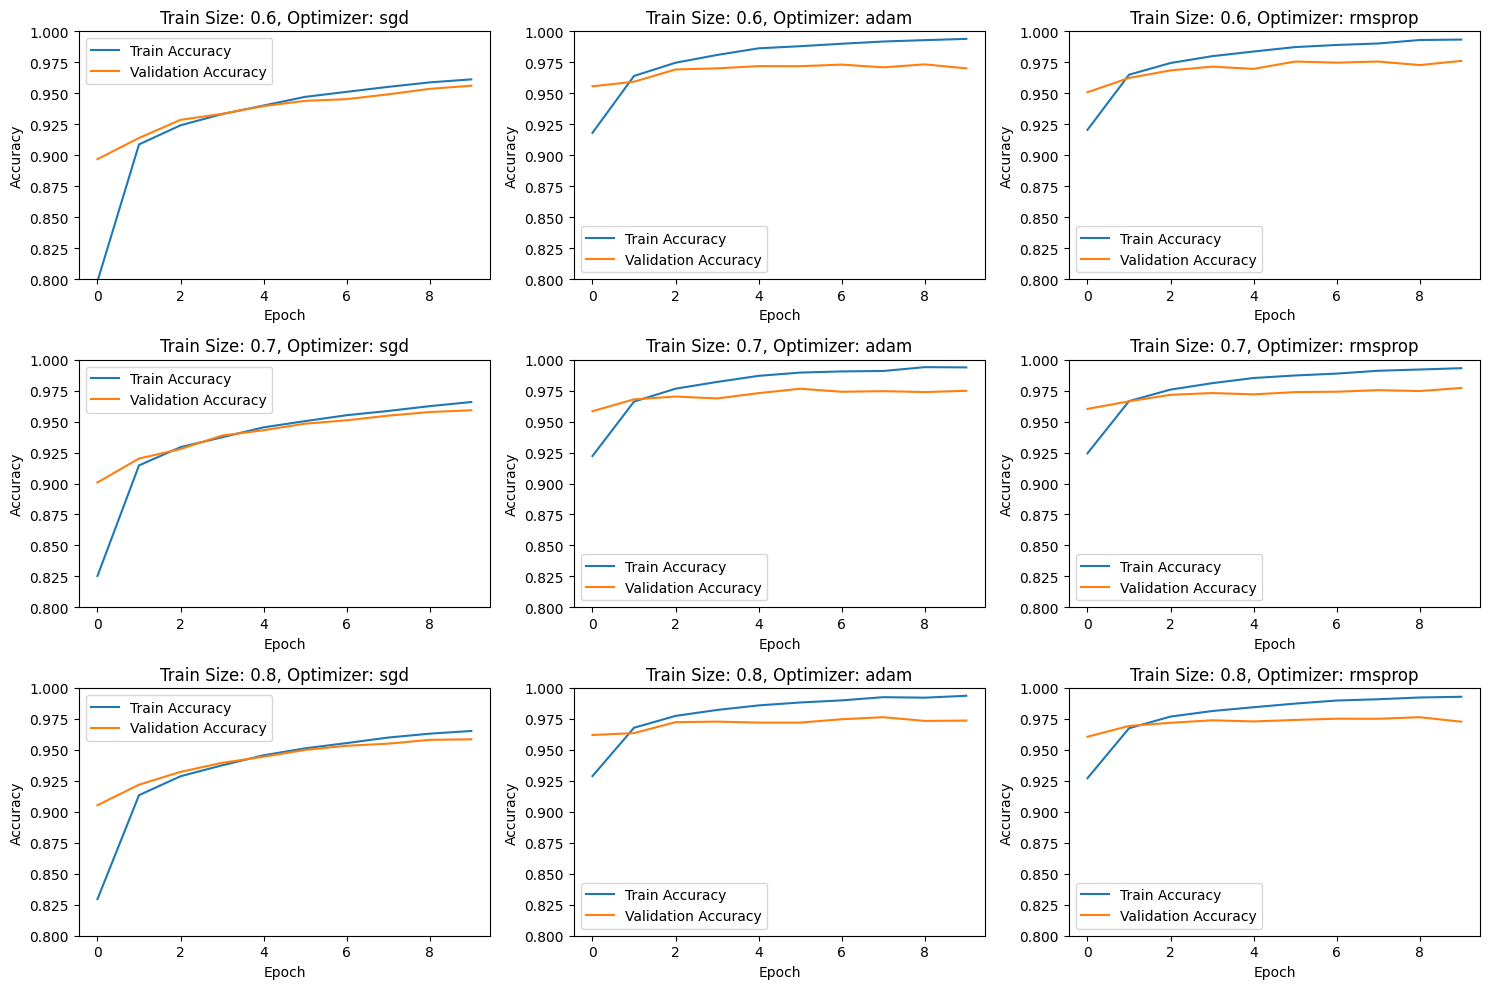

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target
X = X / 255.0
y = y.astype(int)

def create_mlp_model(input_shape, num_classes):
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=input_shape),
        layers.Dense(64, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

def train_and_evaluate_model(X_train, y_train, X_test, y_test, optimizer, epochs=10):
    # The number of unique classes for MNIST is 10 (digits 0-9)
    num_classes = 10
    model = create_mlp_model((X_train.shape[1],), num_classes)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=0)
    return history

train_sizes = [0.6, 0.7, 0.8]
optimizers = ['sgd', 'adam', 'rmsprop']

results = {}

for train_size in train_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)
    for opt in optimizers:
        history = train_and_evaluate_model(X_train, y_train, X_test, y_test, opt)
        results[(train_size, opt)] = history.history

plt.figure(figsize=(15, 10))
for i, train_size in enumerate(train_sizes):
    for j, opt in enumerate(optimizers):
        plt.subplot(len(train_sizes), len(optimizers), i * len(optimizers) + j + 1)
        plt.plot(results[(train_size, opt)]['accuracy'], label='Train Accuracy')
        plt.plot(results[(train_size, opt)]['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Train Size: {train_size}, Optimizer: {opt}')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.ylim(0.8, 1.0)
        plt.legend()

plt.tight_layout()
plt.show()